# R Workbook 2: Using Joins, aggregations, and visualizations

In previous workbook, we looked at how to bring in a dataset in a Data Frame and explore it. In this workbook, we'll explore how to join 2 data frames. In addition, we'll look at using basic visualizations.

## <span style = "color:green">Motivating Question</span>

So far, we've gone over basic R operations such as subsetting data, describing data, and reading in CSV files. However, part of what makes R so useful is its powerful tools and functionality. There are many insights we might find from properly analyzing data using joins, aggregrations, and visualizing the reusults, so we want to be able to bring that all together. In this notebook, we'll explore how to do that as we try to answer the following questions:

**What is the difference in the number of jobs by county? What are the job proportions for each county? How many people commute from one county to another for work?**

To answer these, we'll introduce you to joins along with aggregration functions. Finally, we'll show some basic visualizations with the data that we get to bring it all together.

## Starting Out
As before, we'll start by loading libraries. We have a few more commands we'll be running in the beginning since we're also going to be doing some visualizations.

In [1]:
library(tidyverse)
library(dplyr)
options(scipen = 999)

# Visualization settings to make them look nicer in Jupyter
theme_set(theme_gray(base_size = 20))
options(repr.plot.width = 12, repr.plot.height = 9)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
ca_wac_2015 <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_2015.csv.gz",
                        col_types = cols())
ca_xwalk <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/ca_xwalk.csv.gz", col_types = cols())
ca_od_2015 <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/od/ca_od_main_JT00_2015.csv.gz")
ca_rac_2015 <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/rac/ca_rac_S000_JT00_2015.csv.gz")

Parsed with column specification:
cols(
  w_geocode = col_character(),
  h_geocode = col_character(),
  S000 = col_double(),
  SA01 = col_double(),
  SA02 = col_double(),
  SA03 = col_double(),
  SE01 = col_double(),
  SE02 = col_double(),
  SE03 = col_double(),
  SI01 = col_double(),
  SI02 = col_double(),
  SI03 = col_double(),
  createdate = col_double()
)

Parsed with column specification:
cols(
  .default = col_double(),
  h_geocode = col_character()
)

See spec(...) for full column specifications.



In [3]:
head(ca_wac_2015)

head(ca_xwalk)

head(ca_od_2015)

head(ca_rac_2015)

w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,⋯,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001007,30,2,16,12,4,2,24,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001008,4,0,1,3,0,0,4,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001011,3,2,1,0,0,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001017,11,3,3,5,2,2,7,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001024,10,3,3,4,7,1,2,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001026,3,0,2,1,0,2,1,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826


tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,⋯,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
060030100002053,06,CA,California,06003,"Alpine County, CA",06003010000,"100 (Alpine, CA)",060030100002,"2 (Tract 100, Alpine, CA)",⋯,NA,99999,NA,NA,NA,06000005,05 Golden Sierra Consortium WIB,38.79516,-119.7524,20201120
060070013003023,06,CA,California,06007,"Butte County, CA",06007001300,"13 (Butte, CA)",060070013003,"3 (Tract 13, Butte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,39.71869,-121.8163,20201120
060150002031279,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.50887,-124.0304,20201120
060150002031336,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.47926,-123.9541,20201120
060150002031264,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.48899,-123.9836,20201120
060150002031342,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.47135,-123.9519,20201120


w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001007,060014003004007,1,0,1,0,0,0,1,0,0,1,20190826
060014001001007,060014027002024,1,1,0,0,0,0,1,0,0,1,20190826
060014001001007,060014037011000,1,0,1,0,0,0,1,0,0,1,20190826
060014001001007,060014042001011,1,0,1,0,0,0,1,0,0,1,20190826
060014001001007,060014042003000,1,0,1,0,0,0,1,0,0,1,20190826
060014001001007,060014042003004,1,0,1,0,0,0,1,0,0,1,20190826


h_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,⋯,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001007,63,9,30,24,7,10,46,0,0,⋯,1,61,2,5,15,9,25,30,33,20190826
060014001001008,12,2,8,2,1,3,8,0,0,⋯,0,12,0,2,0,5,3,7,5,20190826
060014001001011,11,1,7,3,2,2,7,0,0,⋯,0,9,2,0,2,3,5,4,7,20190826
060014001001014,10,2,4,4,2,2,6,0,0,⋯,0,9,1,1,2,2,3,4,6,20190826
060014001001015,16,1,10,5,2,2,12,0,0,⋯,0,16,0,2,0,7,6,7,9,20190826
060014001001017,9,1,7,1,0,1,8,0,0,⋯,0,9,0,1,2,2,3,6,3,20190826


## <span style="color:green">Joins</span>

One of the nice things about relational databases is organization using multiple tables that are linked together in some way. For example, suppose we have one table with 6 rows called **Table A**:

| blockid | C000|
|---|---|
|1|5|
|2|10|
|3|2|
|4|6|
|5|22|
|6|9|

And another table with 5 rows called **Table B**:

| blockid | CA01|
|---|---|
|2|2|
|5|4|
|6|1|
|7|2|
|8|0|

Let's say we want to combine Table A and Table B so that we have one table that contains information about `blockid`, `C000`, and `CA01`. We want to do this by matching the two tables by what they have in common, `blockid`. That is, we want a table that looks like this (let's call this **Table C**):

| blockid | C000 | CA01 |
|---|---|---|
|2|10|2|
|5|22|4|
|6|9|1|

Table C has each `blockid` that was in both Table A and Table B. It also contains the appropriate values for `C000` and `CA01` corresponding to each `blockid`. This kind of matching can be quite tricky to figure out manually, since there are different numbers of rows in each table, not all of the `blockid` values match for the two tables, and there are some `blockid` values that aren't in both. Fortunately for us, SQL is well-equipped to handle this task using the `JOIN` statement.

### R Code and how it works


Now that we have established a plan for how we're joining two tables together, let's take a look at the R code that performs this join and break it down.

    df_inner_join <- inner_join(
    ca_xwalk, ca_wac_2015, 
    by = c("tabblk2010" = "w_geocode"))

Let's look at the first two lines.

    df_inner_join <- inner_join(
    ca_xwalk, ca_wac_2015, 

Here, we want to create a variable called `df_inner_join` which will store the results of the inner join, then we are calling the function `inner_join`. The second line takes the `ca_xwalk` table and joins the `ca_wac_2015` table to it.

We can't just mash two tables together though -- we need some way of making sure that the appropriate rows match. We do this with the third line:

    by = c("tabblk2010" = "w_geocode"))
    
This part specifies what we're joining on. That is, what is the ID variable that is in both tables that we want to match. Notice that they don't need to be named the same in both tables, though you do need to specify what they are in each table, even if they are the same.

If you run the full code below, you should see the full results of the joined table. You should be able to scroll through all of the variables and see that we've managed to merge the `ca_wac_2015` and `ca_xwalk` tables together according to their census block IDs.

> **Side note:** We're only going to be displaying a few of the columns which we can do using the `select` function. This is because we aren't able to display more than 50 columns here in this notebook format. Joining to get tables with greater than 50 columns is perfectly fine, but we'll only look at a few at a time to make it easier to follow in these exercises.

In [4]:
df_inner_join <- inner_join(ca_xwalk, ca_wac_2015, by = c("tabblk2010" = "w_geocode")) %>%
    select (tabblk2010, C000, CA01, CA02, CA03, ctyname, cbsaname)
    
head(df_inner_join)

tabblk2010,C000,CA01,CA02,CA03,ctyname,cbsaname
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
060030100002053,6,3,2,1,"Alpine County, CA",NA
060239400001134,1,0,0,1,"Humboldt County, CA","Eureka-Arcata, CA"
060150002012014,4,2,1,1,"Del Norte County, CA","Crescent City, CA"
060133050002018,23,3,12,8,"Contra Costa County, CA","San Francisco-Oakland-Berkeley, CA"
060133050003083,184,32,110,42,"Contra Costa County, CA","San Francisco-Oakland-Berkeley, CA"
060210102004045,27,3,17,7,"Glenn County, CA",NA


## <span style="color:red">Checkpoint: Get Census Data and Join with your Tables

Try joining the Residence Area Characteristics table with the Crosswalk table in a similar manner, as well as changing some of the columns to display. As you construct your query, make sure you answer the following question regarding the join:

- What are they being joined on? That is, what is the "ID" variable you're matching on in each table?
- What information does the resulting table give you? For example, after we join the WAC table to the geography crosswalk table, we are now able to determine counties or metropolitan/micropolitan areas for census block containing workplaces.
    > Hint: the Residence Area Characteristics table is title `ca_rac_2015` and the Crosswalk table is title `ca_xwalk`.



## <span style="color:green">Different Types of Joins (VIDEO)</span>

We've so far done only one type of join, an inner join. However, there are different types of joins.

### Left and Right Joins in SQL


Suppose we want to look at every single census block in one table, only filling in information from the second table if it exists. We'll illustrate this using Table A and Table B from before. Recall that our `inner_join` created Table C:

| blockid | C000 | CA01 |
|---|---|---|
|2|10|2|
|5|22|4|
|6|9|1|

Instead, we want to create the following table:

| blockid | C000 | CA01 |
|---|---|---|
|1|5|*null*|
|2|10|2|
|3|2|*null*|
|4|6|*null*|
|5|22|4|
|6|9|1|

Here, we've kept every single row in Table A, and simply filled in the information from Table B if it existed for that `blockid`. This is called a **LEFT JOIN**, since we're taking the table on the left (that is, Table A) and adding the information from Table B onto that. We could have also done a **RIGHT JOIN**, which does the same thing, except flipping the tables, giving us something that looks like:

| blockid | C000 | CA01|
|---|---|---|
|2|10|2|
|5|22|4|
|6|9|1|
|7|*null*|2|
|8|*null*|0|

# Applying Left Joins
When might you use left or right joins? Suppose you want to know which census blocks don't have any jobs. Then, we'd want to make sure that we keep all of the census blocks in the geography crosswalk, even if they aren't present in the workplace area characteristics tables, and add in the workplace area characteristics. This would mean that any blocks with an `na` value in the `C000` column would be blocks without any jobs. 

To do this `JOIN`, we can use the `left_join` statement.

In [5]:
df_left_join <- left_join(ca_xwalk, ca_wac_2015, by = c("tabblk2010" = "w_geocode"), keep = TRUE)  %>% 
    select (w_geocode, tabblk2010, C000, CA01, CA02, CA03, ctyname, cbsaname) #%>% drop_na()



head(df_left_join)

w_geocode,tabblk2010,C000,CA01,CA02,CA03,ctyname,cbsaname
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
060030100002053,060030100002053,6,3,2,1,"Alpine County, CA",NA
NA,060070013003023,NA,NA,NA,NA,"Butte County, CA","Chico, CA"
NA,060150002031279,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"
NA,060150002031336,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"
NA,060150002031264,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"
NA,060150002031342,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"


This is very similar to what we've done already with `inner_join`, except we add the word `LEFT` to it. When doing `LEFT` and `RIGHT JOIN`s, make sure to keep track of which one is first. Here, `ca_xwalk` comes first, so that's the table on the "left" side.

### Full Join

A full join keeps all unique ids, then puts `NULL` if it isn't part of that table. This is similar to a `left` or `right_join`, except instead of only keeping all IDs from one table, it keeps them from both tables. Consider our example with Table A and Table B. We want to join them such that we get a table that looks like:

| blockid | C000 | CA01 |
|---|---|---|
|1|5|*null*|
|2|10|2|
|3|2|*null*|
|4|6|*null*|
|5|22|4|
|6|9|1|
|7|*null*|2|
|8|*null*|0|

In a way, it's like combining the `left` and `right_join`s so that we have all information from both tables.

### Applying Outer Joins

Suppose we want to know which census blocks that contain either the residences of people with jobs in the state or the census blocks of the location of the workplace, but not both. We use `full_join` for that.

In [6]:
df_full_join <- full_join(ca_xwalk, ca_wac_2015, by = c("tabblk2010" = "w_geocode"))  %>% 
    select (tabblk2010, C000, CA01, CA02, CA03, ctyname, cbsaname) 

head(df_full_join)

tabblk2010,C000,CA01,CA02,CA03,ctyname,cbsaname
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
060030100002053,6,3,2,1,"Alpine County, CA",NA
060070013003023,NA,NA,NA,NA,"Butte County, CA","Chico, CA"
060150002031279,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"
060150002031336,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"
060150002031264,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"
060150002031342,NA,NA,NA,NA,"Del Norte County, CA","Crescent City, CA"


This will let us see which census blocks contain values for both workplace characteristics and residence characteristics. 

## <span style="color:red">Checkpoint: Types of Joins</span>

Consider the following situations. How would you answer the question posed? What type of join should you use for each one? Which tables do you need to join? Try doing the join.

- How many census blocks in the state contain a workplace and how many don't? Recall that the geography crosswalk table contains information about the census blocks in the state.
- Which county contains the most census blocks containing a workplace?
- Which metropolitan/micropolitan area had the most census blocks containing a residence of a worker in the state?

Let's count the total number of missing jobs by county using the `df_left_join` table.

In [7]:
total_na_jobs_by_county <- df_left_join %>%
    group_by(ctyname) %>%
    summarize(
        total_missing_jobs = sum(is.na(C000))
    ) %>%
    ungroup() %>% 
    arrange(desc(total_missing_jobs))

head(total_na_jobs_by_county)

`summarise()` ungrouping output (override with `.groups` argument)



ctyname,total_missing_jobs
<chr>,<int>
"Los Angeles County, CA",48328
"San Bernardino County, CA",35965
"Kern County, CA",29920
"San Diego County, CA",26402
"Riverside County, CA",23463
"Orange County, CA",20697


Lets figure out how many jobs are in each county. The first thing we want to do is `group_by` `ctyname`. Then we want to use the `summarize` function to sum the total number jobs in the `C000` column. Finally, we need to use the `ungroup()` function because if we don't, future calculations will likely produce errors.  

In [8]:
total_jobs_by_county <- df_inner_join %>%
    group_by(ctyname) %>%
    summarize(
        total_jobs = sum(C000)
    ) %>%
    ungroup() 

head(total_jobs_by_county)

`summarise()` ungrouping output (override with `.groups` argument)



ctyname,total_jobs
<chr>,<dbl>
"Alameda County, CA",751240
"Alpine County, CA",398
"Amador County, CA",11214
"Butte County, CA",76587
"Calaveras County, CA",8436
"Colusa County, CA",9551


Now that we have total amount of jobs by county, let's calculate the proportion of jobs by county and then order them in descending order. This can be accomplished by taking the existing data frame `total_jobs_by_county` then using the `arrange()` function to order the variable `total_jobs`. Then, we can use the `mutate()` function to add a column called `prop` and setting that equal to `total_jobs` divided by the sum of `total_jobs`. I multiplied the results by 100 to get the percentage.

In [9]:
total_jobs_prop <- total_jobs_by_county %>%
    arrange(desc(total_jobs)) %>%
    mutate(
        prop = total_jobs/sum(total_jobs)*100) 
head(total_jobs_prop)

ctyname,total_jobs,prop
<chr>,<dbl>,<dbl>
"Los Angeles County, CA",4443135,27.685245
"Orange County, CA",1578369,9.834843
"San Diego County, CA",1338649,8.341143
"Santa Clara County, CA",1006868,6.273811
"Alameda County, CA",751240,4.680988
"San Francisco County, CA",700616,4.365550


Now, let's do something a little more complicated, let's figure out how many people commute from one county to another for work. To do this we will need the `ca_od_2015` table which is the Origin-Destination (OD) data, and we need to `left_join` this table with the `ca_xwalk` table which is the crosswalk data. Let's look at the first join and break that down:

First, we are taking the `ca_od_2015` table, selecting only the `w_geocode`, `h_geocode`, and `S000` colunmns from that table. Next, we are performing a `left_join` with the `ca_xwalk` table. The chunk of code`(ca_xwalk[,c('tabblk2010', 'ctyname')]` is selecting only the `tabblk2010`, and `ctyname` columns from the `ca_xwalk` table. Selecting only the columns you need makes reading the results and debugging any errors you may enounter easier. Then, we are joining on `w_geocode = tabblk2010` because these are the matching columns in the two tables. This join is brining in the Workplace Area Characteristic data.

In [10]:
workplace_commute <- ca_od_2015 %>% 
    select(w_geocode, h_geocode, S000) %>% 
    left_join(ca_xwalk[,c('tabblk2010', 'ctyname')], by = c("w_geocode" = "tabblk2010"))
head(workplace_commute)

w_geocode,h_geocode,S000,ctyname
<chr>,<chr>,<dbl>,<chr>
060014001001007,060014003004007,1,"Alameda County, CA"
060014001001007,060014027002024,1,"Alameda County, CA"
060014001001007,060014037011000,1,"Alameda County, CA"
060014001001007,060014042001011,1,"Alameda County, CA"
060014001001007,060014042003000,1,"Alameda County, CA"
060014001001007,060014042003004,1,"Alameda County, CA"


Now we have to perform another `left_join` to bring in the Residence Area Characteristic data. To do this, we are using the `ca_xwalk[,c('tabblk2010', 'ctyname')` table and left joining that to the `workplace_commute` table that we created above. This time we are joining by `h_geocode = tabblk2010` because we want the residence data. This resulting table will now have the county name for residence data and the county name for workplace data. We will also renmae the `ctyname.x` and `ctyname.y` columns to `residence_county` and `workplace_county`, respectively because they are not intuitive.


In [11]:
residence_commute <- workplace_commute %>% 
    left_join(ca_xwalk[,c('tabblk2010', 'ctyname')], by = c("h_geocode" = "tabblk2010")) %>%
    rename(
        residence_county = ctyname.x,
        workplace_county = ctyname.y
    )
head(residence_commute)

w_geocode,h_geocode,S000,residence_county,workplace_county
<chr>,<chr>,<dbl>,<chr>,<chr>
060014001001007,060014003004007,1,"Alameda County, CA","Alameda County, CA"
060014001001007,060014027002024,1,"Alameda County, CA","Alameda County, CA"
060014001001007,060014037011000,1,"Alameda County, CA","Alameda County, CA"
060014001001007,060014042001011,1,"Alameda County, CA","Alameda County, CA"
060014001001007,060014042003000,1,"Alameda County, CA","Alameda County, CA"
060014001001007,060014042003004,1,"Alameda County, CA","Alameda County, CA"


To get the total number of people that commute from one county to another, we need to group by the `residency_county` and `workplace_county` columns. Then, we will create a column called `total_commute` which sums the `S000` column. Finally we need to `ungroup()` the table, otherwise any future calculations with grouped data would result in unintended errors. 

In [50]:
total_commute_df <- residence_commute %>% 
    group_by(residence_county, workplace_county) %>%
    summarize(
        total_commute = sum(S000)
    ) %>%
    ungroup() %>%
    arrange(desc(total_commute))
head(total_commute_df, 5)

`summarise()` regrouping output by 'residence_county' (override with `.groups` argument)



residence_county,workplace_county,total_commute
<chr>,<chr>,<dbl>
"Los Angeles County, CA","Los Angeles County, CA",3445814
"San Diego County, CA","San Diego County, CA",1107348
"Orange County, CA","Orange County, CA",921445
"Santa Clara County, CA","Santa Clara County, CA",616335
"Riverside County, CA","Riverside County, CA",407948


## <span style="color:red">Checkpoint: Types of Joins</span>

Consider the following situations. How would you answer the question posed? What type of join should you use for each one? Which tables do you need to join? Try doing the join.

- How many census blocks in the state contain a workplace and how many don't? Recall that the geography crosswalk table contains information about the census blocks in the state.
- Which county contains the most census blocks containing a workplace?
- Which metropolitan/micropolitan area had the most census blocks containing a residence of a worker in the state?

## <font color = 'green'>Visualizations using `qplot`</font>
    
Visualizations can help us look at summaries of the data. They can also aid in providing good presentation aids.

In this section, we'll look at a few basic types of visualizations: histograms, boxplots, lineplots. In practice, there are many more types of visualizations. Furthermore, there are many different packages that can help you create these different visualizations. While we'll focus only on the basics here with the base R functions as well as `qplot` from the `ggplot2` package, keep in mind that there are many tools available.

### Making a Histogram
We'll start with a basic histogram. A histogram is useful for looking at the distribution of a numerical variable (that is, a variable that takes numbers as its values as opposed to categories). They can visually represent the spread and center of the variable, as well as provide insights to the shape of the distribution. For example, we can look at the number of **modes**, or peaks, in the data, which wouldn't be captured in numerical summaries such as mean or variance. We can also get a better idea of the **skew** of the data, determining whether most units are grouped on the left or right side (lower or higher values), or whether it's mostly symmetrical. 

We'll first look at the simplest way to make a graph, then show how to customize it using the plotting parameters as well as Figure and Axes objects. Let's look at a histogram of the total number of missing jobs by county in the 2015 Workplace Area Characteristics for California.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



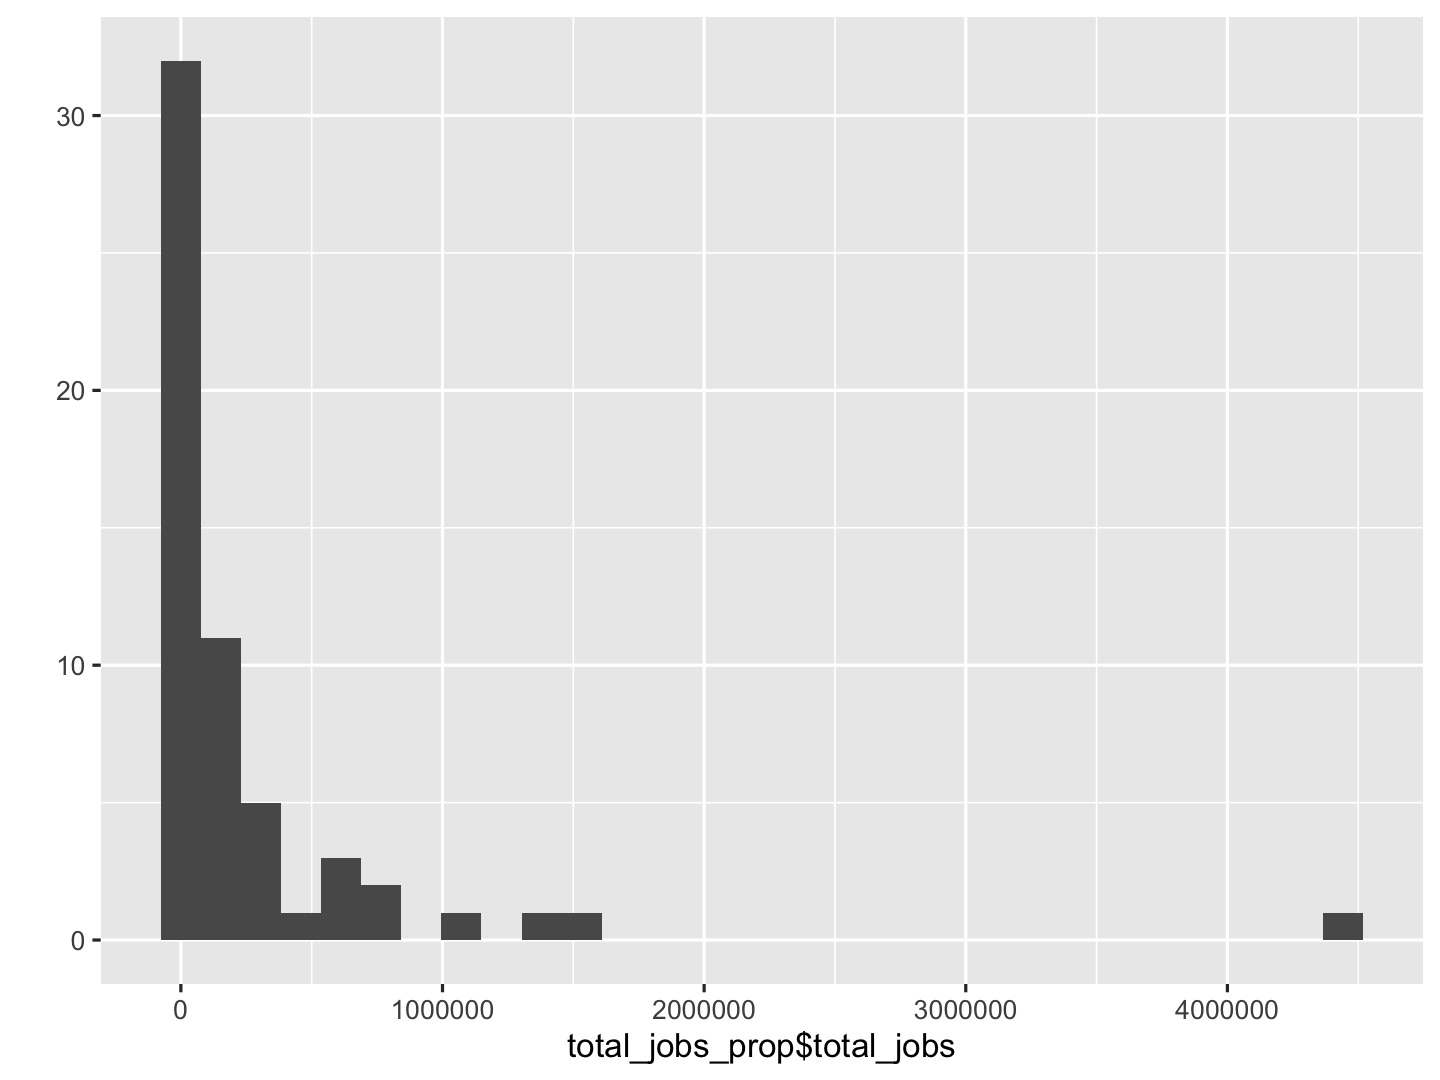

In [13]:
qplot(total_jobs_prop$total_jobs)

In [55]:
total_commute_top5

residence_county,workplace_county,total_commute
<chr>,<chr>,<dbl>
"Los Angeles County, CA","Los Angeles County, CA",3445814
"San Diego County, CA","San Diego County, CA",1107348
"Orange County, CA","Orange County, CA",921445
"Santa Clara County, CA","Santa Clara County, CA",616335
"Riverside County, CA","Riverside County, CA",407948


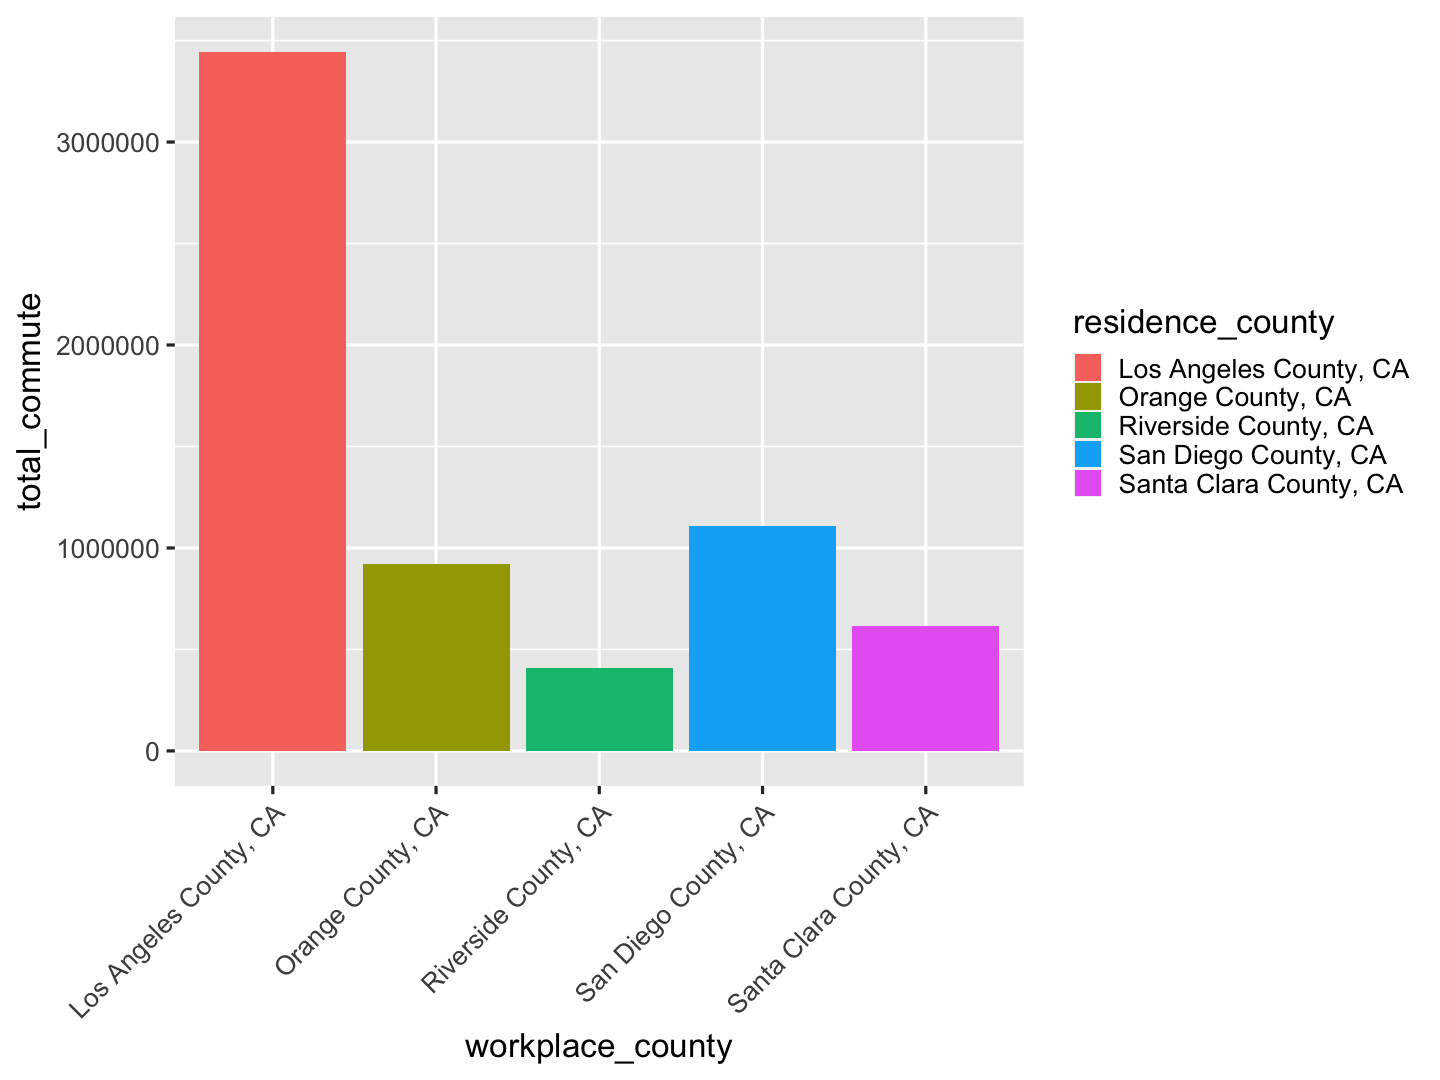

In [54]:
library(ggplot2)
ggplot(total_commute_top5, aes(fill=residence_county, y=total_commute, x=workplace_county)) + 
    geom_bar(position="stack", stat="identity") + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

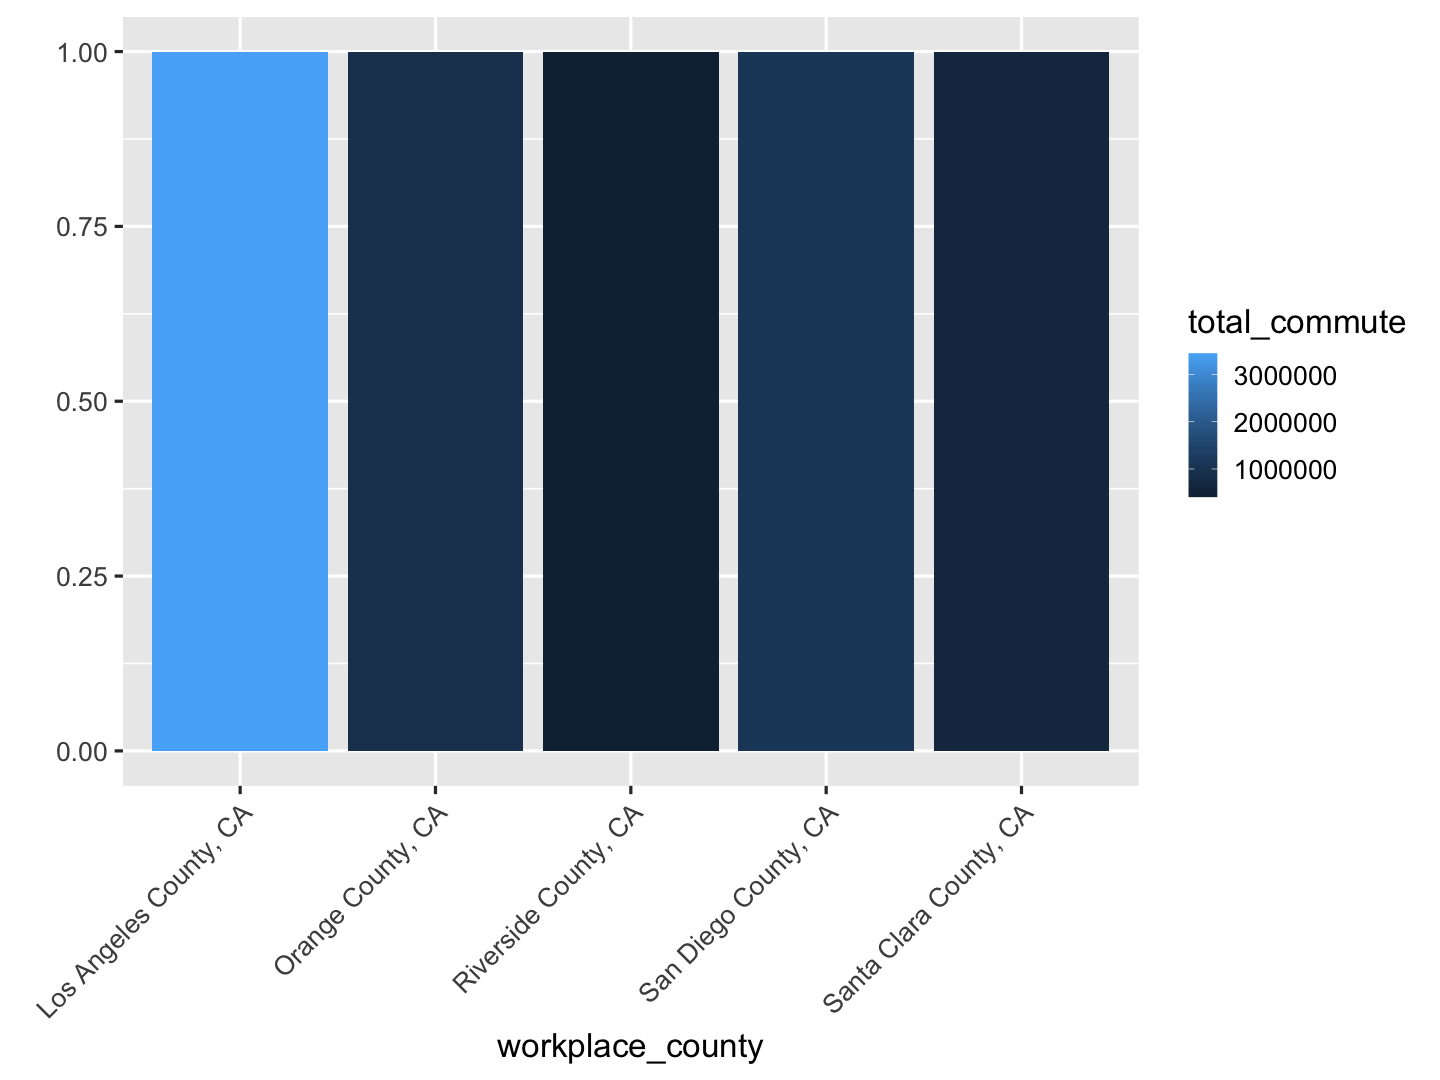

In [51]:
#total_commute_df$total_commute <- scale(total_commute_df$total_commute)
total_commute_top5 <- head(total_commute_df,5)

qplot(x=workplace_county, data=total_commute_top5, geom = "bar",fill=total_commute) + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

### Making a Scatterplot

When looking at two numerical variables to see if there is a correlation, we might want to use a scatterplot to visualize them. We can simply use the base R `plot` function, passing it the x and y variables as the arguments. 

Let's look at an example looking at the relationship between number of jobs for two different age groups.

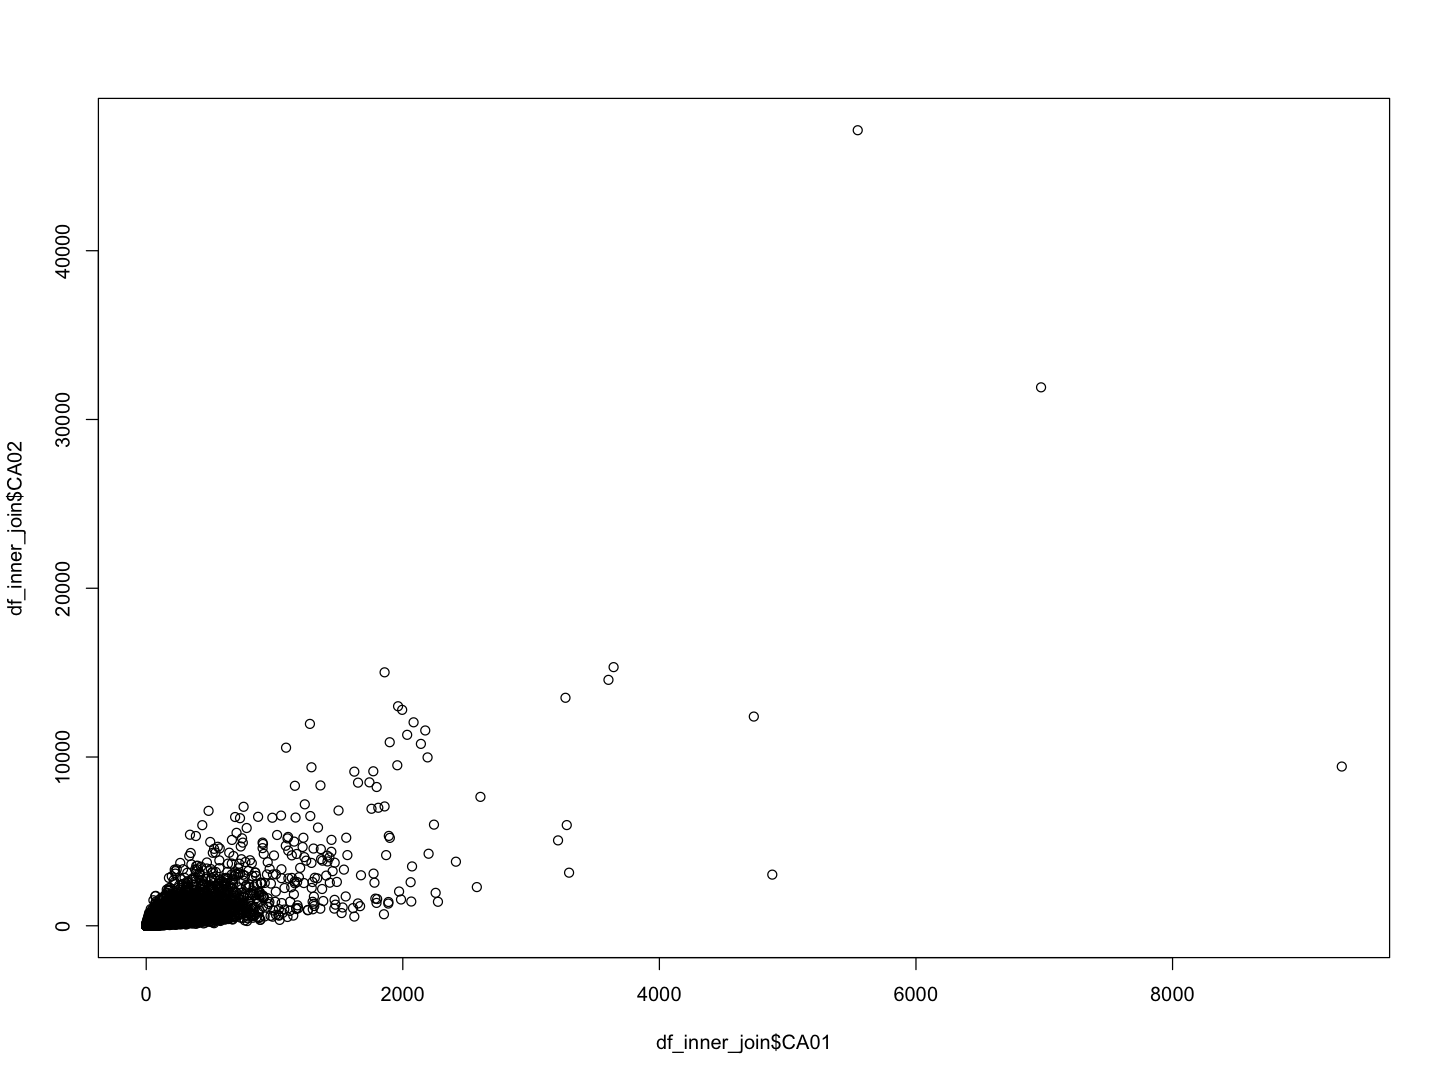

In [39]:
plot(df_inner_join$CA01, df_inner_join$CA02)

## <span style="color:red">Checkpoint: Visualize Your Data</span>

Using the methods we've described above, try visualizing data from a different state. What do the visualizations tell you? How are they different from the data from California? How are they the same? Does this make sense?

# Resources
Understanding Joins

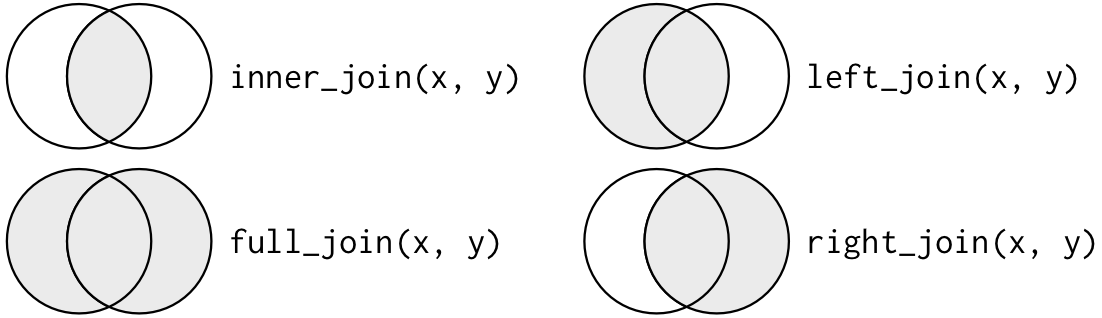

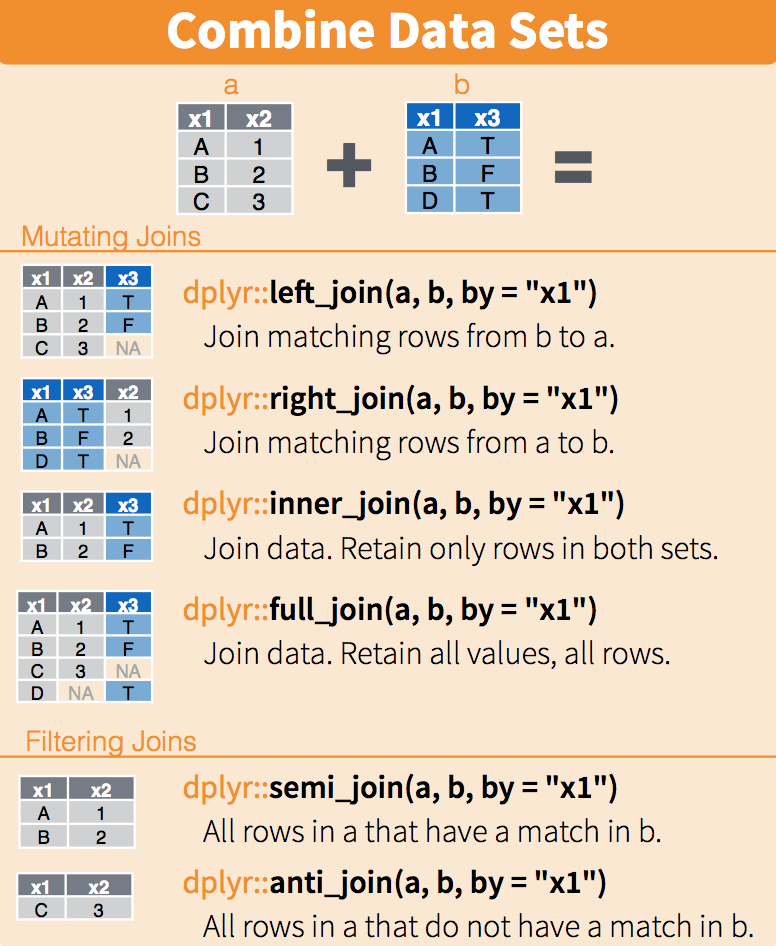